In [1]:
#matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

## Punto 1

In [2]:
Min, Max, N = 0.,40.,11
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [23]:
def h1(y):
    return 280.
def h2(y):
    return 180
def h3(x):
    return 190.
def h4(x):
    return 0.

In [14]:
def InitT():
    
    T = np.zeros((N,N))
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [25]:
def GetRelaxation(T, Nit = int(1e5), omega = 1.9, tolerancia = 1e-2):
    
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T,itmax

In [26]:
w = np.linspace(1, 1.90, 100)
iterations = []

for i in range (len(w)):
    T = InitT()
    Tf1,_ = GetRelaxation(T,omega = w[i])
    iterations.append(_)

iterations = np.array(iterations)

  1%|          | 1171/100000 [00:19<27:25, 60.04it/s] 
1171
  1%|          | 1154/100000 [00:08<12:39, 130.22it/s]
1154
  1%|          | 1138/100000 [00:08<12:32, 131.32it/s]
1138
  1%|          | 1122/100000 [00:07<11:42, 140.77it/s]
1122
  1%|          | 1105/100000 [00:07<11:10, 147.59it/s]
1105
  1%|          | 1090/100000 [00:07<11:22, 144.91it/s]
1090
  1%|          | 1074/100000 [00:07<10:57, 150.54it/s]
1074
  1%|          | 1059/100000 [00:06<10:39, 154.81it/s]
1059
  1%|          | 1043/100000 [00:06<10:45, 153.42it/s]
1043
  1%|          | 1028/100000 [00:07<11:49, 139.48it/s]
1028
  1%|          | 1013/100000 [00:12<19:33, 84.32it/s] 
1013
  1%|          | 999/100000 [00:10<17:27, 94.52it/s]
999
  1%|          | 984/100000 [00:11<19:57, 82.66it/s] 
984
  1%|          | 970/100000 [00:10<18:13, 90.55it/s]
970
  1%|          | 955/100000 [00:07<12:49, 128.67it/s]
955
  1%|          | 941/100000 [00:06<10:36, 155.67it/s]
941
  1%|          | 927/100000 [00:05<10:36, 155.62it/s

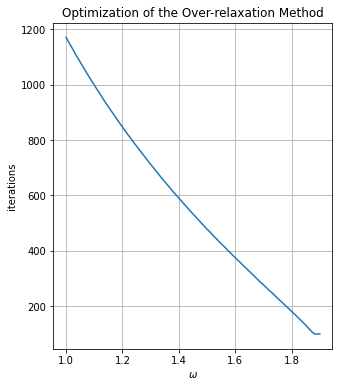

In [28]:
plt.figure(figsize = (5,6))
plt.title("Optimization of the Over-relaxation Method")
plt.xlabel(r"$\omega$")
plt.ylabel("iterations")

plt.plot(w,iterations)

plt.grid()

plt.show()


## Punto 4

In [29]:
#Parametros 

V0 = 1
nu = 0.2
omega_ = 0.9

N = 51

limxmaxOb = 25
limxminOb = 5
limyminOb = 5
limymaxOb = 30

Xmin, Xmax, Npoints_x = 0.,1,N
Ymin, Ymax, Npoints_y = 0.,1,N

x = np.linspace(Xmin, Xmax, Npoints_x)
y = np.linspace(Ymin, Ymax, Npoints_y)


h = (Xmax - Xmin) / (N-1)
R = V0*h/nu

u = np.zeros((Npoints_x, Npoints_y))
w = np.zeros((Npoints_x, Npoints_y))

print(h)

0.02


In [30]:
def BoundaryCurrent():
    
    for j in range(len(y)):
            
        #Izquierda
        u[1,j] = u[0, j]

        #Derecha
        u[-1,j] = u[-2,j] 
    
        #Arriba
        u[j, -1] = u[j, -2] + V0*h*y[-1]
        
        #Abajo
        u[j, 0] = 0
        


In [31]:
def BoundaryVorticity():
    
    for j in range(len(y)):
            
        #Izquierda
        w[0,j] = 0
        
        #Derecha
        w[-1,j] = 0
        #w[-2,j]
        
        #Arriba
        w[j, -1] = 0
        
        #Abajo
        w[j, 0] = 0
        

In [32]:
def BoundaryCurrentObject():
    
    for i in range(limxminOb , limxmaxOb + 1):
        
        for j in range(limyminOb, limymaxOb + 1):
            
            #Izquierda
            u[limxminOb, j] = 0
        
            #Derecha
            u[limxmaxOb, j] = 0
        
            #Arriba
            u[i, limymaxOb] = 0
        
            #Abajo
            u[i, limyminOb] = 0
                               

In [33]:
def BoundaryVorticityObject():
    
    #Izquierda
    for j in range(limyminOb, limymaxOb + 1):
        w[limxminOb, j] = (-2/(h**2))*(u[limxminOb + 1, j] - u[limxminOb, j])
        
    #Derecha
    for j in range(limyminOb, limymaxOb + 1):
        w[limxmaxOb, j] = (-2/(h**2))*(u[limxmaxOb - 1, j] - u[limxmaxOb , j])
        
    #Arriba
    for i in range(limxminOb, limxmaxOb + 1):
        w[i, limymaxOb] = (-2/(h**2))*(u[i, limymaxOb - 1] - u[i, limymaxOb])
        
    #Abajo
    for i in range(limxminOb, limxmaxOb + 1):
        w[i, limyminOb] = (-2/(h**2))*(u[i, limyminOb + 1] - u[i, limyminOb])

In [34]:
def Get_Relaxation(Nit = 1000, tolerancia = 1e-5):
    
    for it in tqdm(range(Nit)):
        
        BoundaryCurrent()
        BoundaryVorticity()
        BoundaryCurrentObject()
        BoundaryVorticityObject()
        
        
        emax1 = 0.
        emax2 = 0.
        
        for i in range(1, len(x)-1):
            
            for j in range(1, len(y)-1):
               
                if (i > (limxminOb + 1) and i < (limxmaxOb - 1) and j < (limymaxOb - 1) and j > (limyminOb + 1)):
                    u[i, j] = 0
                    w[i, j] = 0
                    
                else:
                    #Para la función de corriente

                    relaxU = 0.25*(u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] + ((h**2*w[i, j])))
                    rU = omega_*(relaxU - u[i, j])
                    u[i, j] += rU

                    if (np.abs(rU) > emax1):
                        emax1 = rU   
             
            
                    
        for i in range(1, len(x)-1):
            
            for j in range(1, len(y)-1):
                
                if (i > (limxminOb + 1) and i < (limxmaxOb - 1) and j < (limymaxOb - 1) and j < (limyminOb + 1)): 
                    u[i, j] = 0
                    w[i, j] = 0
                    
                    
                else:
                    #Para la vorticidad
                    relaxW = 0.25*(w[i+1, j] + w[i-1, j] + w[i, j+1] + w[i, j-1] \
                                           - (R*0.0625)*(((u[i, j+1] - u[i, j-1])*(w[i+1, j]- w[i-1, j])) \
                                                         - ((u[i+1, j] - u[i - 1, j])*(w[i, j+1] - w[i, j-1]))))

                    rW = omega_*(relaxW - w[i, j])
                    w[i, j] += rW

                    if (np.abs(rW) > emax2):
                        emax2 = rW

                
        #print(np.abs(emax1), np.abs(emax2))
        
        if ((np.abs(emax1) < tolerancia) and  (np.abs(emax2) < tolerancia)):
            break

In [35]:
Get_Relaxation(Nit = 1000, tolerancia = 1e-5)

100%|██████████| 1000/1000 [00:18<00:00, 52.81it/s]


Text(0.5, 1.0, 'Stream function')

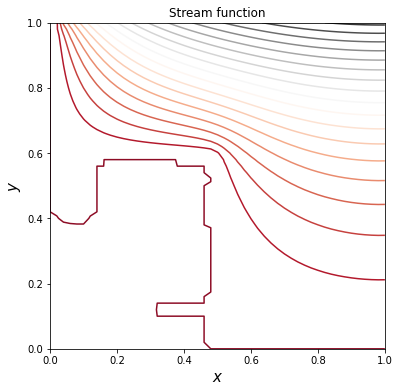

In [36]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(1,1,1)

X,Y = np.meshgrid(x,y)
ax1.set_xlabel(r'$x$', fontsize=15)
ax1.set_ylabel(r'$y$', fontsize=15)
c1 = ax1.contour(X,Y, u.T, 20, cmap = "RdGy")
ax1.set_title("Stream function")

Text(0.5, 1.0, 'Vorticity')

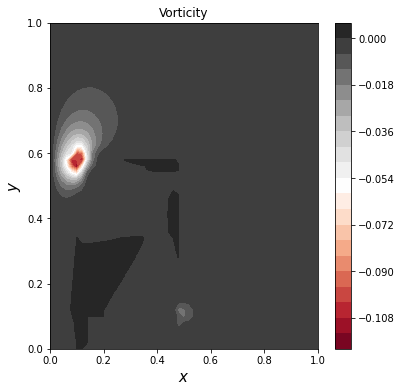

In [37]:
fig2 = plt.figure(figsize=(6,6))
ax2 = fig2.add_subplot(1,1,1)

ax2.set_xlabel(r'$x$', fontsize=15)
ax2.set_ylabel(r'$y$', fontsize=15)
c2 = ax2.contourf(X,Y, w.T, 20, cmap = "RdGy")
fig2.colorbar(c2, ax = ax2)
ax2.set_title("Vorticity")

Text(0, 0.5, '$y[m]$')

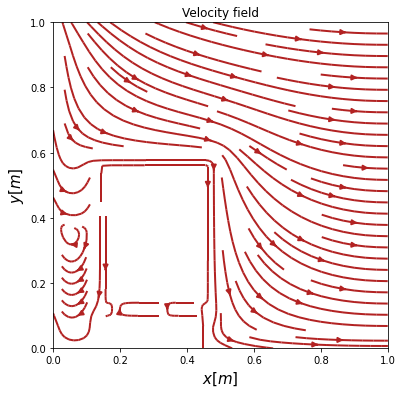

In [38]:
vx = np.zeros((Npoints_x, Npoints_y))
vy = np.zeros((Npoints_x, Npoints_y))

for i in range(1, len(x) - 1):
    for j in range(1, len(y) - 1):
        vx[i, j] = (u.T[i+1, j] - u.T[i-1, j])/(2*h)
        vy[i, j] = -(u.T[i, j + 1] - u.T[i, j - 1])/(2*h)

        
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(1,1,1)

strm = plt.streamplot(X, Y, vx, vy, density = 1.0, color = "firebrick", linewidth = 2, cmap = "autumn")
ax3.set_title("Velocity field")
ax3.set_xlabel(r'$x[m]$', fontsize=15)
ax3.set_ylabel(r'$y[m]$', fontsize=15)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f6a3a29-06b0-4707-8d0c-2d9a260063ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>